**Bacchanal Buffet using yelp, foursquare and twitter data, analyze reviews, customer's sentiment and provide suggestions.**

1. Text Processing = Küçük harf, noktalama işaretleri, sayıları kaldır
2. * tfidf, count vectorizer word embedded
3. Modelleri kullan fit predict
4. 1,2 -- 3 -- 4,5 3 farklı cevap var, Multinomial naive bayes kullan
5. lamdetect ile 42 ingilizce olmayan yorumu silme
6. stem, lemma ek kaldır
7. Ngram kullan 1,2,3
8. Classifier 8 adet dene
9. TextBlob sentiment ile epsilon komşuluğu -1, +1 arası değerler var aralık belirterek bölme örn -0.2 ve 0.2 arası nötr 0.2+ poz , -0.2- neg
10. 5 yıldız ve 1 yıldız word cloud yap
11. ngram ile 2-3 kelimeye birden bak
12. Stopwords kaldır, Negatif cümleleri analiz et en çok kullanılan 10 tanesini bul

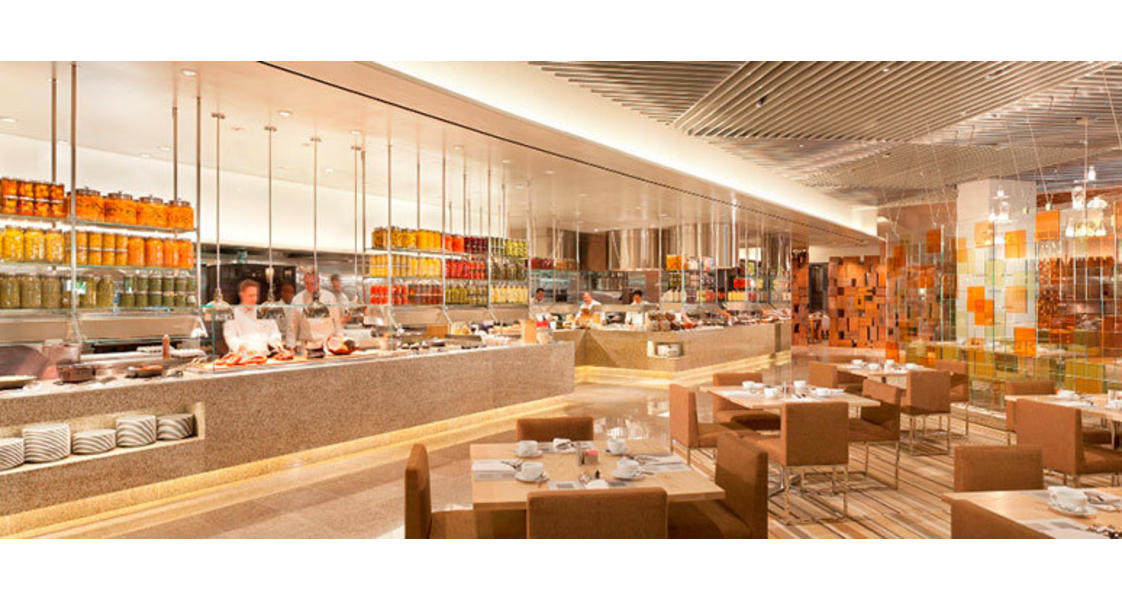

In [1]:
!pip install vaderSentiment
import pandas as pd
import re
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.0 MB/s eta 0:00:00


In [5]:
df = pd.read_csv('restaurant.csv')

In [30]:
df

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18,2012
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50,2014
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09,2015
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29,2016
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17,2015
...,...,...,...,...,...,...,...,...,...,...,...
10412,3220114,46xWDTFPZI9u6waHm78EKw,CT57mpNepL9q9sTYFqRbLQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,"Best buffet ever! Irma was great, served us be...",2019-11-17 20:39:36,2019
10413,3220152,gbBau-2wy3_kNr2y6dEa1Q,c-j3TV1F8rI6bQUD6nqGPQ,RESDUcs7fIiihp38-d6_6g,4,3,0,3,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,2019-11-12 02:23:07,2019
10414,3220255,2wFmrsm8j1cyyG-DoMqKUw,kbylx63ynkXL8YBJzVfNnQ,RESDUcs7fIiihp38-d6_6g,5,0,0,0,The selection is amazing and all the food is e...,2019-12-12 03:27:22,2019
10415,3220306,75nzyA96_BgVrpflweAA3w,6rEG-G4syq5IvWti4tyPXA,RESDUcs7fIiihp38-d6_6g,4,1,1,2,One of the best buffets I've had in Vegas. My ...,2019-11-01 21:00:51,2019


In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
review_id,0
user_id,0
business_id,0
stars,0
useful,0
funny,0
cool,0
text,0
date,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


In [10]:
# df['date'] sütunundaki sadece ilk 4 veriyi al
df['year'] = df['date'].str[:4]

In [12]:
df['year'].value_counts()

,count
year,
2019,1685
2017,1588
2015,1419
2018,1407
2016,1372
2014,1319
2013,1200
2012,427


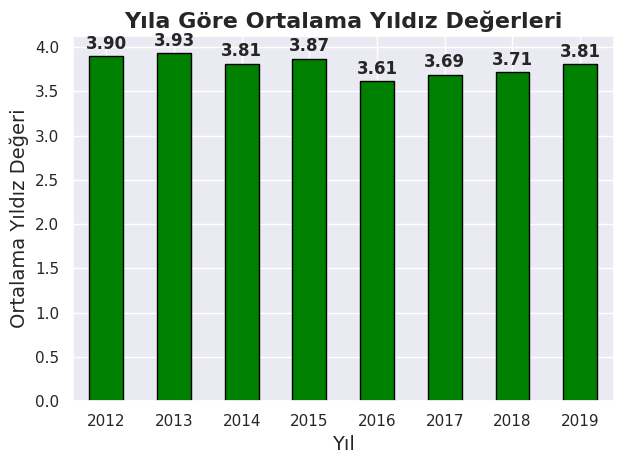

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn teması
sns.set_theme(style="darkgrid")

# Grafik oluşturma
ax = df.groupby('year')['stars'].mean().plot(kind='bar', color='green', edgecolor='black')

# Başlık ve etiketler ekleme
ax.set_title('Yıla Göre Ortalama Yıldız Değerleri', fontsize=16, fontweight='bold')
ax.set_xlabel('Yıl', fontsize=14)
ax.set_ylabel('Ortalama Yıldız Değeri', fontsize=14)

# Çubukların üzerine veri etiketleri ekleme
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points',
                fontsize=12, fontweight='bold')

# Gösterim
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<ipython-input-48-796f61f1a7df>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stars', data=df, palette='coolwarm')


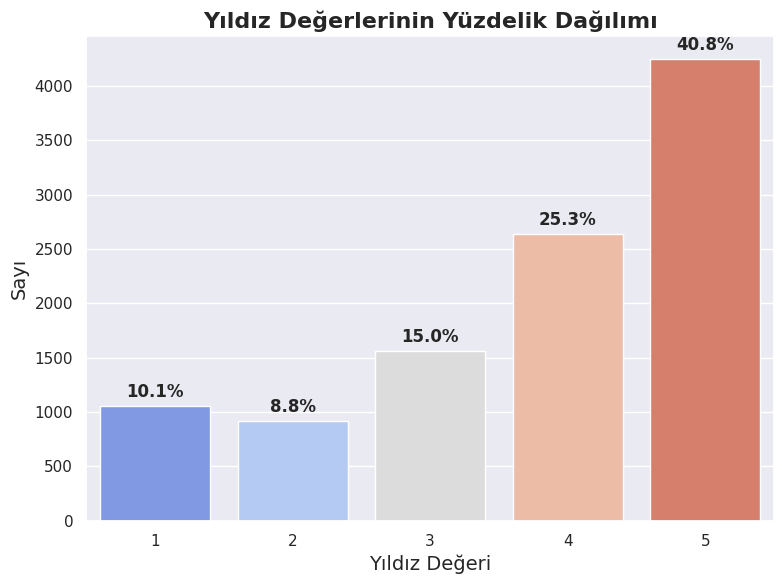

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Her bir yıldız değerinin sayısını bul ve yüzdelik hesapla
total = len(df)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='stars', data=df, palette='coolwarm')

# Yüzdelik değerleri her çubuğun üzerine yazdırma
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    ax.annotate(percentage,
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points',
                fontsize=12, fontweight='bold')

# Grafik etiketleri ve başlık ekleme
plt.xlabel('Yıldız Değeri', fontsize=14)
plt.ylabel('Sayı', fontsize=14)
plt.title('Yıldız Değerlerinin Yüzdelik Dağılımı', fontsize=16, fontweight='bold')

# Grafik gösterimi
plt.tight_layout()
plt.show()

In [34]:
#df['date'] sütunundaki tarihler karışık durumda, ilk ve son tarihi bul
df['date'].min()
df['date'].max()

'2019-12-13 07:33:11'

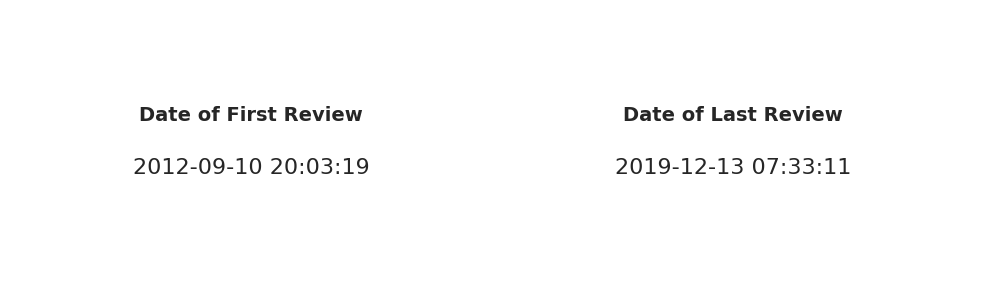

In [39]:
import matplotlib.pyplot as plt

# Minimum ve maksimum tarihleri belirleme
min_date = df['date'].min()
max_date = df['date'].max()

# Basit bir grafik oluşturma
plt.figure(figsize=(10, 3))

# İlk inceleme tarihi (Date of First Review)
plt.text(0.25, 0.6, 'Date of First Review', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(0.25, 0.4, min_date, ha='center', va='center', fontsize=16)

# Son inceleme tarihi (Date of Last Review)
plt.text(0.75, 0.6, 'Date of Last Review', ha='center', va='center', fontsize=14, fontweight='bold')
plt.text(0.75, 0.4, max_date, ha='center', va='center', fontsize=16)

# Eksenleri kaldırma
plt.gca().axis('off')

# Grafik gösterimi
plt.tight_layout()
plt.show()

In [49]:
cleanedtext = df[['text']]

In [51]:
def clean_text(text):
    # Karakterlerin, sayıların ve noktalamanın temizlenmesi
    text = re.sub(r'[^\w\s]', '', text)  # Metinden alfasayısal karakterler ve boşluklar dışındaki tüm sembolleri kaldırır
    text = re.sub(r'\d+', '', text)      # Metindeki tüm sayıları kaldırır
    text = re.sub(r'\n', '', text)       # Metindeki yeni satır (\n) karakterlerini kaldırır
    text = text.lower()                  # Metindeki tüm harfleri küçük harfe çevirir
    return text

In [52]:
cleanedtext['cleanedtext'] = cleanedtext['text'].apply(clean_text)

<ipython-input-52-97c0a467e363>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedtext['cleanedtext'] = cleanedtext['text'].apply(clean_text)


In [53]:
cleanedtext

,text,cleanedtext
0,After getting food poisoning at the Palms hote...,after getting food poisoning at the palms hote...
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",a feast worthy of godsbaccarnal buffet in caes...
2,The crab legs are better than the ones at Wick...,the crab legs are better than the ones at wick...
3,Not worth it! Too salty food and expensive! Th...,not worth it too salty food and expensive this...
4,I would give this infinite stars if I could. M...,i would give this infinite stars if i could my...
...,...,...
10412,"Best buffet ever! Irma was great, served us be...",best buffet ever irma was great served us bett...
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,hollllllyyyy moleyyyy this buffet was one for ...
10414,The selection is amazing and all the food is e...,the selection is amazing and all the food is e...
10415,One of the best buffets I've had in Vegas. My ...,one of the best buffets ive had in vegas my on...


In [55]:
#!pip install langdetect

from langdetect import detect

def is_english(text):
    try:
        return detect(text) == 'en'  # Dil algılama, İngilizce ise True döner
    except:
        return False  # Hata durumunda False döner

# Yalnızca İngilizce satırları tutma
cleanedtext = cleanedtext[cleanedtext['cleanedtext'].apply(is_english)]

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-58-d005fbb10094>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedtext['polarity'] = cleanedtext['cleanedtext'].apply(lambda x: TextBlob(x).sentiment.polarity)
<ipython-input-58-d005fbb10094>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedtext['subjectivity'] = cleanedtext['cleanedtext'].apply(lambda x: TextBlob(x).sentiment.subjectivity)
<ipython-input-58-d005fbb10094>:17: SettingWithCopyWarning: 
A value i

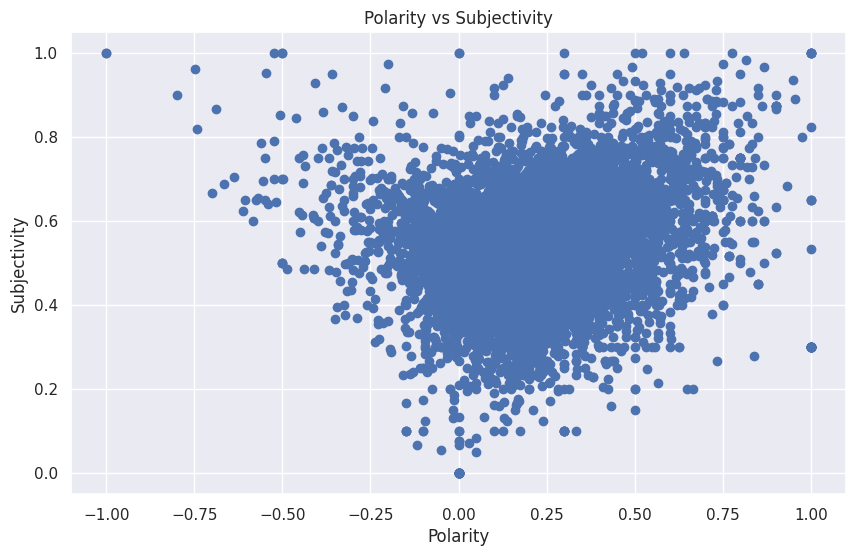

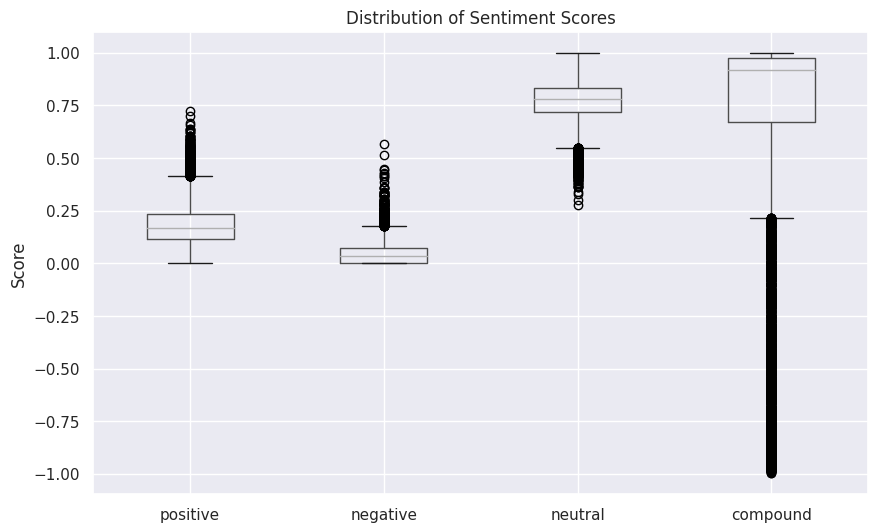

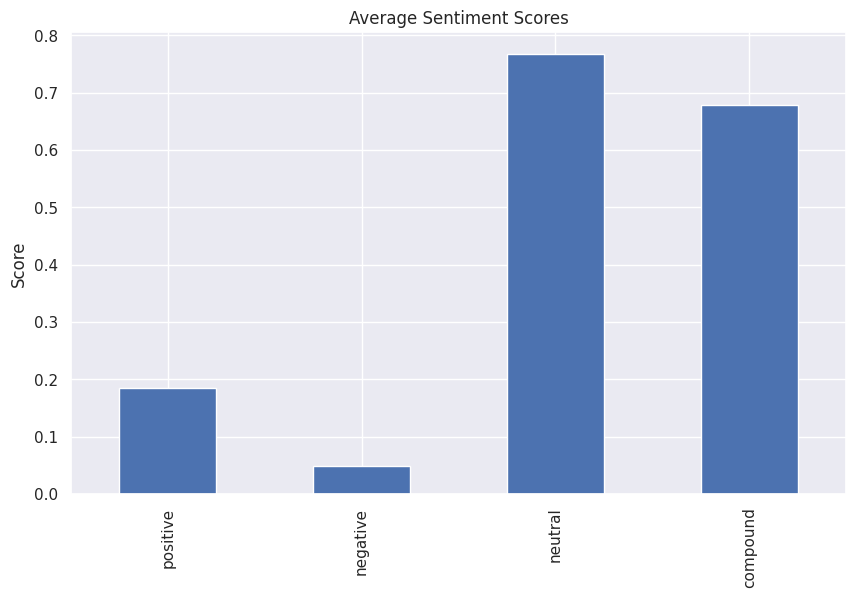

In [58]:
import nltk
nltk.download('vader_lexicon')
import pandas as pd
import numpy as np
from textblob import TextBlob
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import base64
from io import BytesIO

# TextBlob ile Polarity ve Subjectivity hesaplama
cleanedtext['polarity'] = cleanedtext['cleanedtext'].apply(lambda x: TextBlob(x).sentiment.polarity)
cleanedtext['subjectivity'] = cleanedtext['cleanedtext'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# NLTK SentimentIntensityAnalyzer ile skorları hesaplama
sia = SentimentIntensityAnalyzer()
cleanedtext['sentiment_scores'] = cleanedtext['cleanedtext'].apply(lambda x: sia.polarity_scores(x))
cleanedtext['positive'] = cleanedtext['sentiment_scores'].apply(lambda x: x['pos'])
cleanedtext['negative'] = cleanedtext['sentiment_scores'].apply(lambda x: x['neg'])
cleanedtext['neutral'] = cleanedtext['sentiment_scores'].apply(lambda x: x['neu'])
cleanedtext['compound'] = cleanedtext['sentiment_scores'].apply(lambda x: x['compound'])

# Görselleştirme fonksiyonları
def plot_to_base64(plt):
    buf = BytesIO()
    plt.savefig(buf, format='png', bbox_inches='tight')
    buf.seek(0)
    return base64.b64encode(buf.getvalue()).decode('utf-8')

# Polarity ve Subjectivity dağılımı
plt.figure(figsize=(10, 6))
plt.scatter(cleanedtext['polarity'], cleanedtext['subjectivity'])
plt.title('Polarity vs Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
polarity_subjectivity_plot = plot_to_base64(plt)

# Duygu skorları dağılımı
plt.figure(figsize=(10, 6))
cleanedtext[['positive', 'negative', 'neutral', 'compound']].boxplot()
plt.title('Distribution of Sentiment Scores')
plt.ylabel('Score')
sentiment_scores_plot = plot_to_base64(plt)

# Ortalama duygu skorları
mean_scores = cleanedtext[['positive', 'negative', 'neutral', 'compound']].mean()
plt.figure(figsize=(10, 6))
mean_scores.plot(kind='bar')
plt.title('Average Sentiment Scores')
plt.ylabel('Score')
average_scores_plot = plot_to_base64(plt)

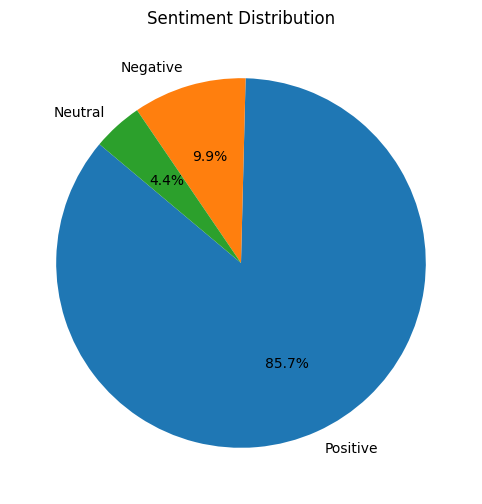

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = bacchanal_data['sentiment_category'].value_counts() # 3 farklı datayı al

# pie chart yap
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.show()

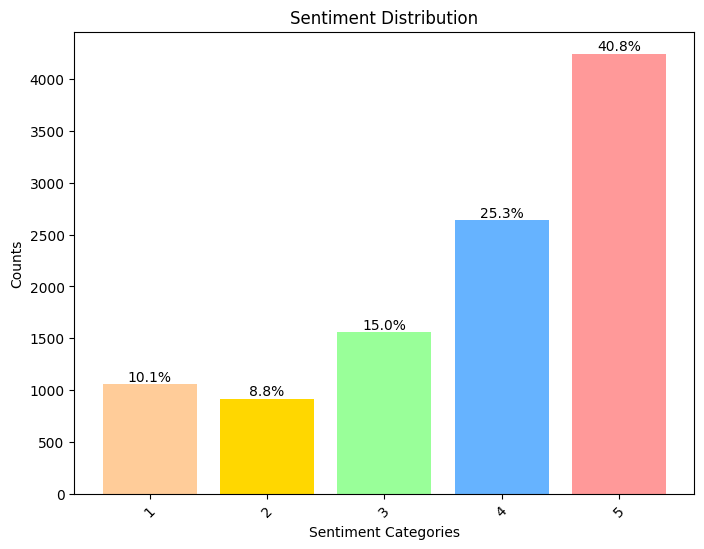

In [ ]:
df1 = pd.read_csv('restaurant.csv')

stars_sentiment_counts = df1['stars'].value_counts() # 5 farklı datayı al

total_counts = stars_sentiment_counts.sum()

colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700']

# Create the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(stars_sentiment_counts.index, stars_sentiment_counts.values,color=colors)

# Add percentage labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    percentage = (yval / total_counts) * 100  # Calculate percentage
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{percentage:.1f}%',
             ha='center', va='bottom')  # Center the percentage text above the bar

plt.xlabel('Sentiment Categories')  # Label for the x-axis
plt.ylabel('Counts')                 # Label for the y-axis
plt.title('Sentiment Distribution')  # Title of the bar chart
plt.xticks(rotation=45)              # Rotate x-axis labels if necessary
plt.show()

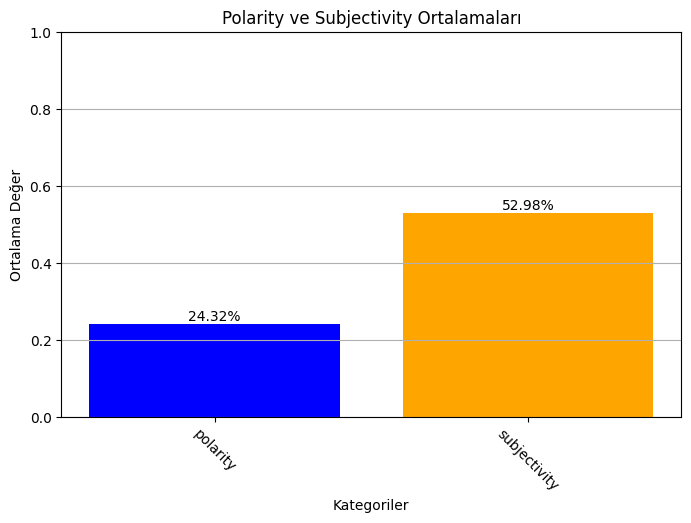

In [ ]:
mean_values = bacchanal_data[['polarity', 'subjectivity']].mean()

# Görselleştirme
plt.figure(figsize=(8, 5))
bars = plt.bar(mean_values.index, mean_values, color=['blue', 'orange'])

# Yüzde değerlerini ekle
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2%}', ha='center', va='bottom')

plt.title('Polarity ve Subjectivity Ortalamaları')
plt.xlabel('Kategoriler')
plt.ylabel('Ortalama Değer')
plt.xticks(rotation=-45)
plt.ylim(0, 1)  # Değerlerin 0 ile 1 arasında olduğunu varsayarak
plt.grid(axis='y')
plt.show()

In [59]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import spacy

# NLTK ve Spacy kütüphanelerinin veri kümesini indirin (ilk kullanımda)
nltk.download('stopwords')
nltk.download('punkt')

# Stopwords listesini yükleyin
stop_words = set(stopwords.words('english'))

# Spacy yüklemesi
nlp = spacy.load('en_core_web_sm')

# Kökleyici oluşturma
stemmer = PorterStemmer()

# Temizleme, kökleme ve lemmatizasyon işlemlerini gerçekleştiren fonksiyon
def clean_and_process_text(text):
    # Durma kelimelerini temizleme
    tokens = word_tokenize(text)
    filtered_words = [word for word in tokens if word.lower() not in stop_words]

    # Köklemeyi (stemming) uygulama
    stemmed_words = [stemmer.stem(word) for word in filtered_words]

    # Lemmatizasyon işlemi
    doc = nlp(' '.join(stemmed_words))
    lemmatized_words = [token.lemma_ for token in doc]

    # Sonuçları birleştirme ve döndürme
    return ' '.join(lemmatized_words)

# Örnek DataFrame (Bu örneği gerçek verinizle değiştirin)
# cleanedtext = pd.DataFrame({'cleanedtext': ["This is a sample sentence.", "Another example of text."]})

# Temizleme, kökleme ve lemmatizasyon işlemlerini uygulama
cleanedtext['cleanedtext'] = cleanedtext['cleanedtext'].apply(clean_and_process_text)

# Temizlenmiş DataFrame'i görüntüleme
print(cleanedtext)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                    text  \
0      After getting food poisoning at the Palms hote...   
1      "A feast worthy of Gods"\n\nBaccarnal Buffet i...   
2      The crab legs are better than the ones at Wick...   
3      Not worth it! Too salty food and expensive! Th...   
4      I would give this infinite stars if I could. M...   
...                                                  ...   
10412  Best buffet ever! Irma was great, served us be...   
10413  Hollllllyyyy moleyyyy! \n\nThis buffet was one...   
10414  The selection is amazing and all the food is e...   
10415  One of the best buffets I've had in Vegas. My ...   
10416  I got a chance to go to the Bacchanal Buffett ...   

                                             cleanedtext  polarity  \
0      get food poison palm hotel scare eat buffet fi...  0.337330   
1      feast worthi godsbaccarn buffet caesar palac c...  0.219409   
2      crab leg well one wick spoon huge prawn sheer ... -0.134722   

<ipython-input-59-97b45e7ba327>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanedtext['cleanedtext'] = cleanedtext['cleanedtext'].apply(clean_and_process_text)


In [60]:
cleanedtext

,text,cleanedtext,polarity,subjectivity,sentiment_scores,positive,negative,neutral,compound
0,After getting food poisoning at the Palms hote...,get food poison palm hotel scare eat buffet fi...,0.337330,0.586926,"{'neg': 0.096, 'neu': 0.671, 'pos': 0.234, 'co...",0.234,0.096,0.671,0.9859
1,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",feast worthi godsbaccarn buffet caesar palac c...,0.219409,0.537292,"{'neg': 0.092, 'neu': 0.75, 'pos': 0.158, 'com...",0.158,0.092,0.750,0.9973
2,The crab legs are better than the ones at Wick...,crab leg well one wick spoon huge prawn sheer ...,-0.134722,0.731944,"{'neg': 0.13, 'neu': 0.771, 'pos': 0.098, 'com...",0.098,0.130,0.771,-0.6628
3,Not worth it! Too salty food and expensive! Th...,worth salti food expen furst kast visit buffet,-0.325000,0.400000,"{'neg': 0.089, 'neu': 0.911, 'pos': 0.0, 'comp...",0.000,0.089,0.911,-0.1695
4,I would give this infinite stars if I could. M...,would give infinit star could famili diamond c...,0.362500,0.725000,"{'neg': 0.031, 'neu': 0.739, 'pos': 0.23, 'com...",0.230,0.031,0.739,0.9325
...,...,...,...,...,...,...,...,...,...
10412,"Best buffet ever! Irma was great, served us be...",good buffet ever irma great serv we well place...,0.543750,0.481250,"{'neg': 0.0, 'neu': 0.537, 'pos': 0.463, 'comp...",0.463,0.000,0.537,0.9042
10413,Hollllllyyyy moleyyyy! \n\nThis buffet was one...,hollllllyyyy moleyyyi buffet one book iv never...,0.210101,0.586869,"{'neg': 0.0, 'neu': 0.749, 'pos': 0.251, 'comp...",0.251,0.000,0.749,0.9524
10414,The selection is amazing and all the food is e...,select amaz food excel prepar esmeralda server...,0.480000,0.630000,"{'neg': 0.0, 'neu': 0.504, 'pos': 0.496, 'comp...",0.496,0.000,0.504,0.9565
10415,One of the best buffets I've had in Vegas. My ...,one good buffet I ve vega visit unfortun mar c...,0.185185,0.533333,"{'neg': 0.077, 'neu': 0.748, 'pos': 0.175, 'co...",0.175,0.077,0.748,0.5719


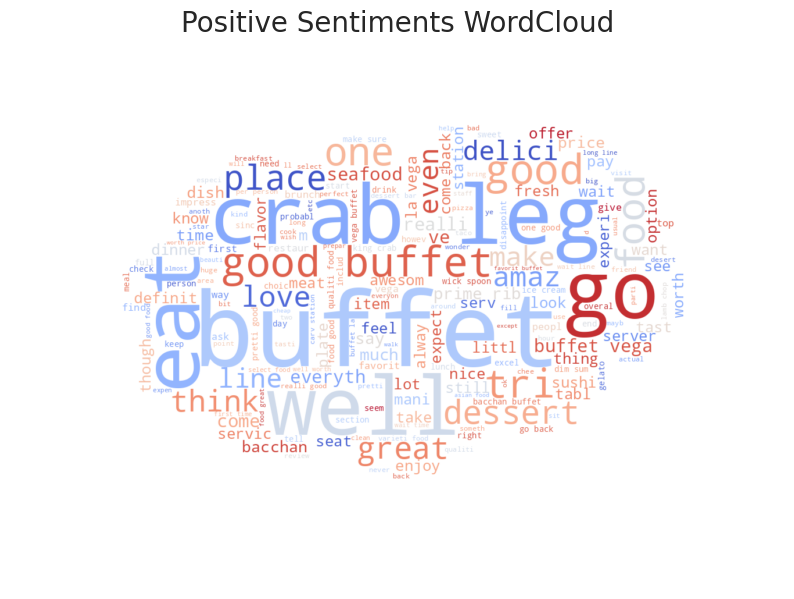

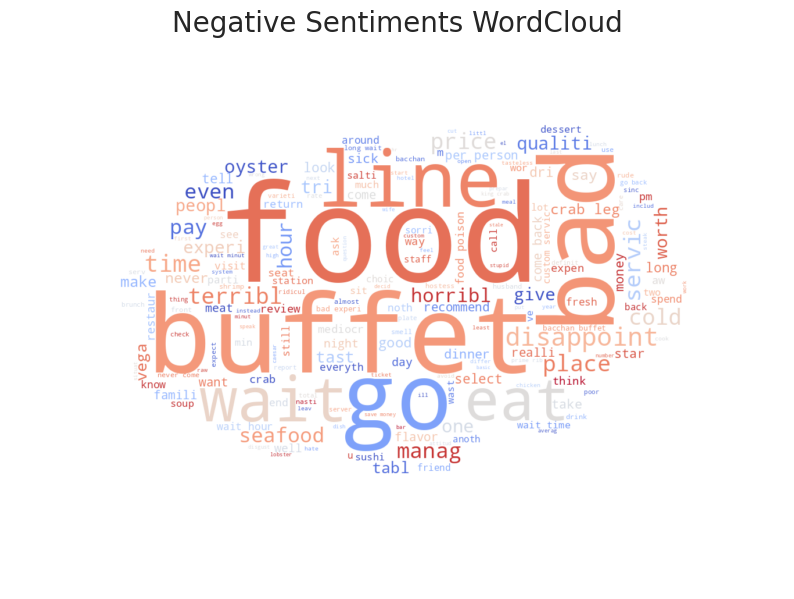

In [62]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

mask_image = np.array(Image.open('cloud.png'))


positive_texts = cleanedtext[cleanedtext['polarity'] > 0.2]['cleanedtext']
positive_text = ' '.join(positive_texts)


negative_texts = cleanedtext[cleanedtext['polarity'] < -0.2]['cleanedtext']
negative_text = ' '.join(negative_texts)

def generate_wordcloud(text, mask_image, title):
    wordcloud = WordCloud(width=800, height=800,
                          background_color='white',
                          mask=mask_image,
                          contour_color='steelblue',
                          contour_width=0,
                          colormap='coolwarm').generate(text)

    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=20)
    plt.show()

generate_wordcloud(positive_text, mask_image, 'Positive Sentiments WordCloud')
generate_wordcloud(negative_text, mask_image, 'Negative Sentiments WordCloud')

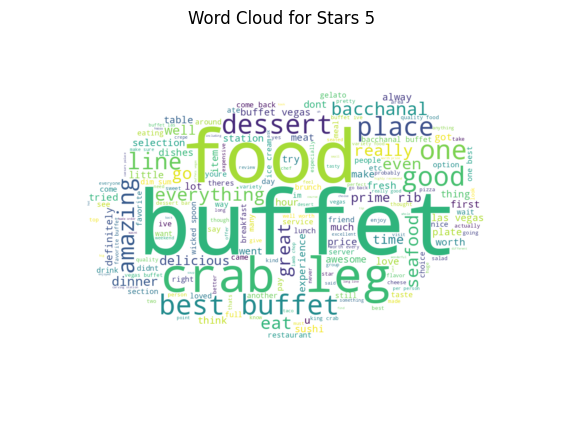

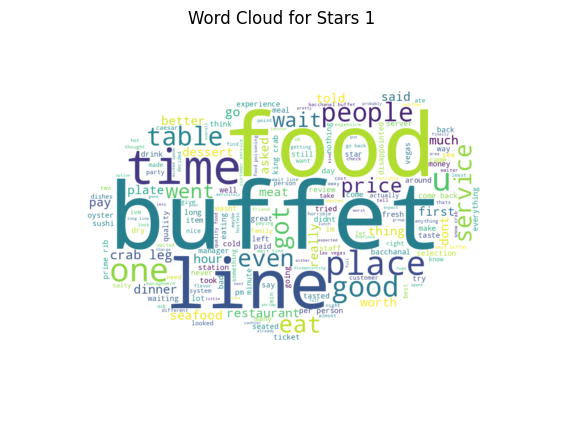

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# stars değeri 5 olanları al
df_stars_5 = df02[df02['stars'] == 5]['cleaned_text_2']
# stars değeri 1 olanları al
df_stars_1 = df02[df02['stars'] == 1]['cleaned_text_2']

# Kelime bulutu oluşturma fonksiyonu
def create_word_cloud(text, title, mask_image):
    mask = np.array(Image.open(mask_image))  # Resmi oku

    wordcloud = WordCloud(width=800, height=400, background_color='white', mask=mask, contour_color='black', contour_width=0).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Arka plan resmi
mask_image_path = 'cloud.png'

# Stars 5 olanların metinlerini birleştir ve kelime bulutu oluştur
combined_text_stars_5 = ' '.join(df_stars_5)
create_word_cloud(combined_text_stars_5, 'Word Cloud for Stars 5', mask_image_path)

# Stars 1 olanların metinlerini birleştir ve kelime bulutu oluştur
combined_text_stars_1 = ' '.join(df_stars_1)
create_word_cloud(combined_text_stars_1, 'Word Cloud for Stars 1', mask_image_path)

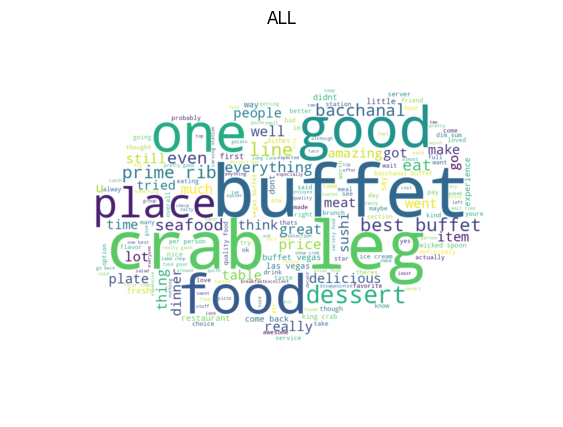

In [ ]:
df_all = df02['cleaned_text_2']
combined_text_stars_6 = ' '.join(df_all)
create_word_cloud(combined_text_stars_6, 'ALL', mask_image_path)

In [ ]:
# Train

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download English stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load data
df = pd.read_csv('restaurant.csv')
df['sentiment'] = df['stars'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in tokens if word not in stop_words])

df['cleanedtext'] = df['text'].apply(preprocess_text)

# Split data
X_train, X_test, y_train, y_test = train_test_split(df['cleanedtext'], df['sentiment'], test_size=0.2, random_state=42)

# Vectorize text
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train and evaluate model
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
predictions = model.predict(X_test_vectorized)
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Accuracy: 0.79
Sentiment: positive


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Bernoulli Naive Bayes': BernoulliNB()
}

# Train and evaluate classifiers
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_vectorized, y_train)

    # Make predictions
    y_pred = clf.predict(X_test_vectorized)

    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Classifier: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print("Classification Report:")
    print(report)
    print("-" * 80)


Classifier: Logistic Regression
Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

    negative       0.67      0.66      0.67       389
     neutral       0.46      0.40      0.43       315
    positive       0.89      0.92      0.90      1380

    accuracy                           0.79      2084
   macro avg       0.67      0.66      0.67      2084
weighted avg       0.78      0.79      0.79      2084

--------------------------------------------------------------------------------
Classifier: K-Nearest Neighbors
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

    negative       0.41      0.30      0.35       389
     neutral       0.22      0.03      0.06       315
    positive       0.71      0.90      0.80      1380

    accuracy                           0.66      2084
   macro avg       0.45      0.41      0.40      2084
weighted avg       0.58      0.66      0.60      2084

-----------------

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


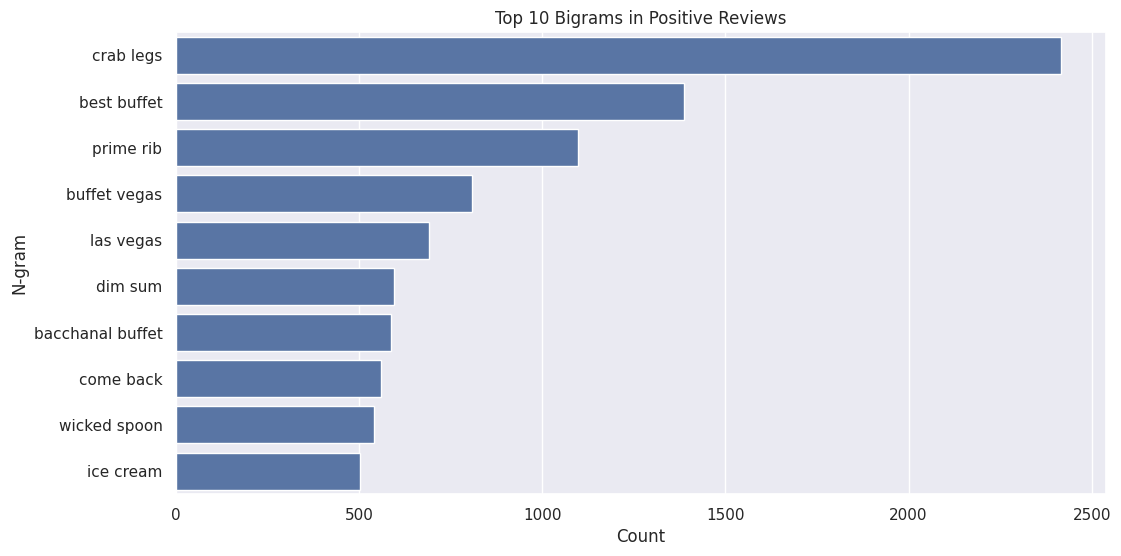

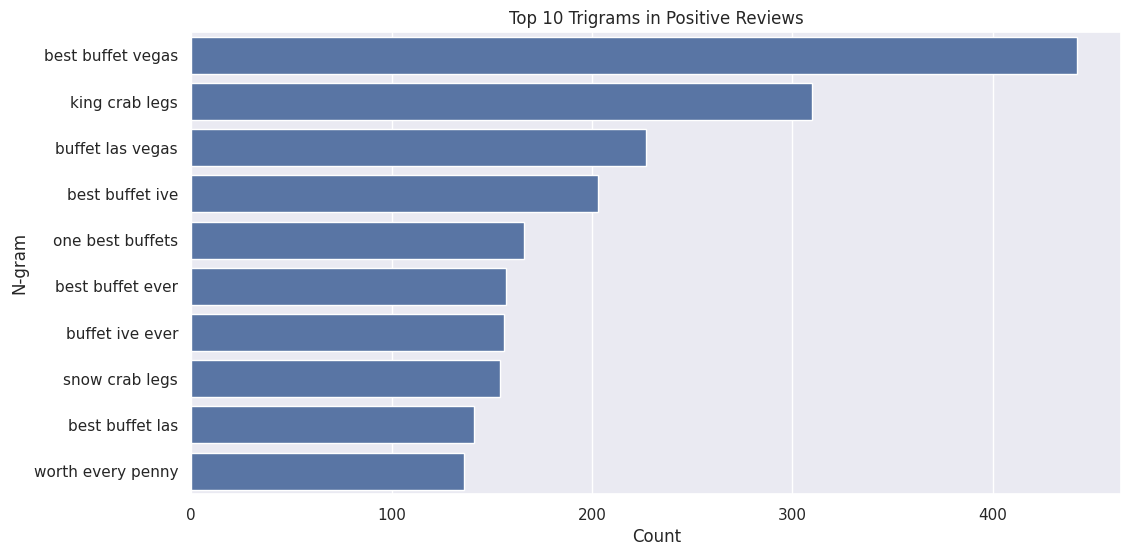

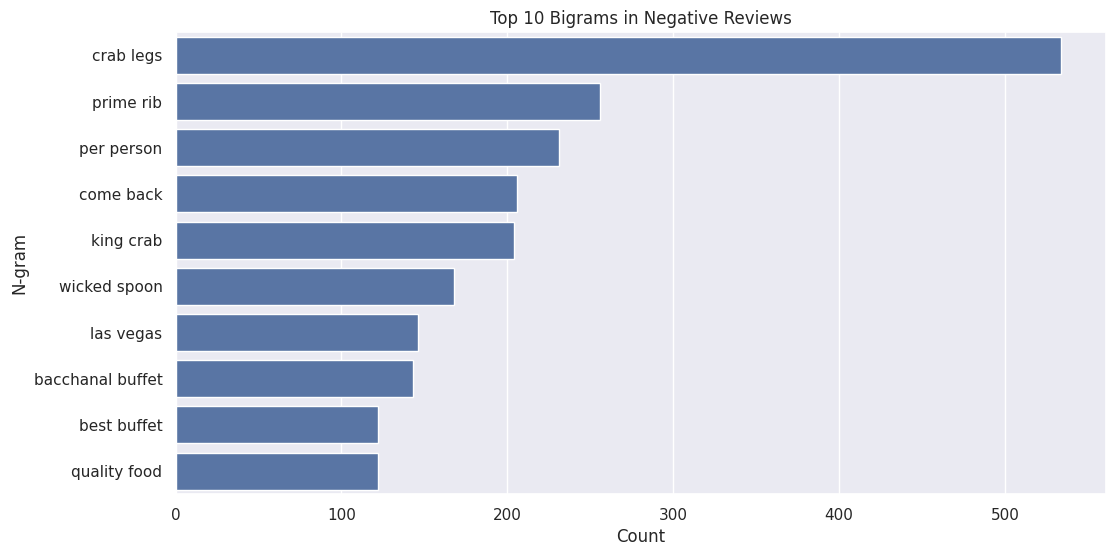

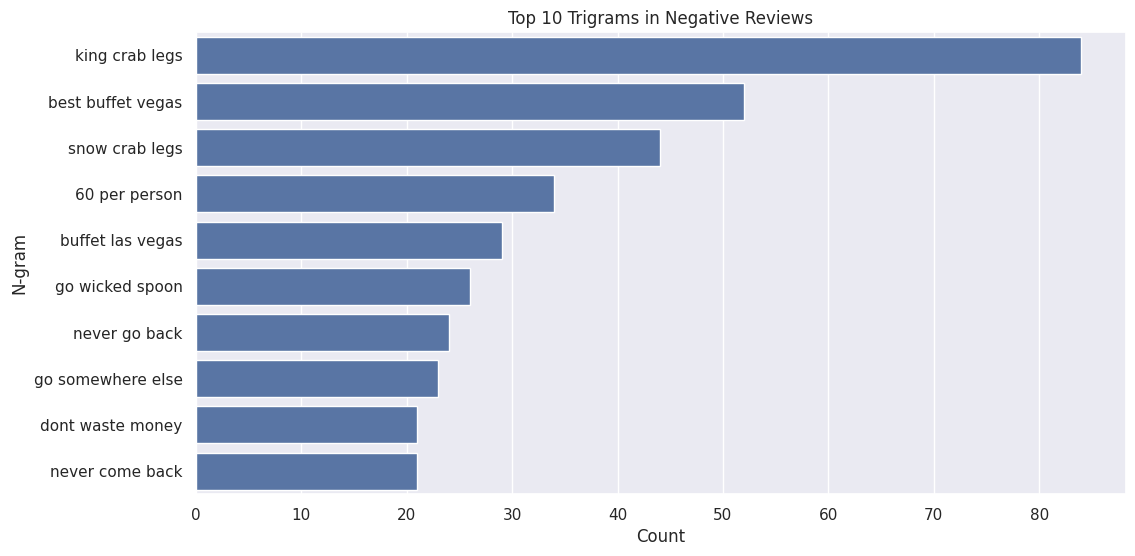

Top 10 Bigrams in Positive Reviews:
[('crab legs', 2417), ('best buffet', 1388), ('prime rib', 1099), ('buffet vegas', 810), ('las vegas', 691), ('dim sum', 595), ('bacchanal buffet', 588), ('come back', 560), ('wicked spoon', 542), ('ice cream', 502)]

Top 10 Trigrams in Positive Reviews:
[('best buffet vegas', 442), ('king crab legs', 310), ('buffet las vegas', 227), ('best buffet ive', 203), ('one best buffets', 166), ('best buffet ever', 157), ('buffet ive ever', 156), ('snow crab legs', 154), ('best buffet las', 141), ('worth every penny', 136)]

Top 10 Bigrams in Negative Reviews:
[('crab legs', 534), ('prime rib', 256), ('per person', 231), ('come back', 206), ('king crab', 204), ('wicked spoon', 168), ('las vegas', 146), ('bacchanal buffet', 143), ('best buffet', 122), ('quality food', 122)]

Top 10 Trigrams in Negative Reviews:
[('king crab legs', 84), ('best buffet vegas', 52), ('snow crab legs', 44), ('60 per person', 34), ('buffet las vegas', 29), ('go wicked spoon', 26), (

In [68]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Download English stopwords
nltk.download('stopwords')
nltk.download('punkt')

# Load data
df = pd.read_csv('restaurant.csv')
df['sentiment'] = df['stars'].apply(lambda x: 'positive' if x > 3 else 'negative' if x < 3 else 'neutral')

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'[^\w\s]', '', str(text).lower())
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    return ' '.join([word for word in tokens if word not in stop_words])

# Create cleanedtext column
df['cleanedtext'] = df['text'].apply(preprocess_text)

# Function to get top n-grams
def get_top_ngrams(corpus, n, ngram_range):
    vec = CountVectorizer(ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Function to plot top n-grams
def plot_top_ngrams(ngrams, title):
    plt.figure(figsize=(12, 6))
    words = [x[0] for x in ngrams]
    counts = [x[1] for x in ngrams]
    sns.barplot(x=counts, y=words)
    plt.title(title)
    plt.xlabel('Count')
    plt.ylabel('N-gram')
    plt.show()

# Positive reviews
positive_reviews = df[df['sentiment'] == 'positive']['cleanedtext']

# Negative reviews
negative_reviews = df[df['sentiment'] == 'negative']['cleanedtext']

# Get top 10 bigrams for positive reviews
top_bigrams_positive = get_top_ngrams(positive_reviews, 10, (2,2))
plot_top_ngrams(top_bigrams_positive, 'Top 10 Bigrams in Positive Reviews')

# Get top 10 trigrams for positive reviews
top_trigrams_positive = get_top_ngrams(positive_reviews, 10, (3,3))
plot_top_ngrams(top_trigrams_positive, 'Top 10 Trigrams in Positive Reviews')

# Get top 10 bigrams for negative reviews
top_bigrams_negative = get_top_ngrams(negative_reviews, 10, (2,2))
plot_top_ngrams(top_bigrams_negative, 'Top 10 Bigrams in Negative Reviews')

# Get top 10 trigrams for negative reviews
top_trigrams_negative = get_top_ngrams(negative_reviews, 10, (3,3))
plot_top_ngrams(top_trigrams_negative, 'Top 10 Trigrams in Negative Reviews')

# Print the results
print("Top 10 Bigrams in Positive Reviews:")
print(top_bigrams_positive)
print("\nTop 10 Trigrams in Positive Reviews:")
print(top_trigrams_positive)
print("\nTop 10 Bigrams in Negative Reviews:")
print(top_bigrams_negative)
print("\nTop 10 Trigrams in Negative Reviews:")
print(top_trigrams_negative)